In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Rutas
ROOT = Path.cwd().resolve().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA = ROOT / "data" / "raw" / "california_housing"

# Cargar CSV
csv_path = sorted(DATA.glob("*.csv"))[0]
print("Usando archivo:", csv_path.name)

df_ca = pd.read_csv(csv_path)
df_ca.head()


Usando archivo: housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Estadísticas básicas numéricas
df_ca.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


<Figure size 1200x800 with 0 Axes>

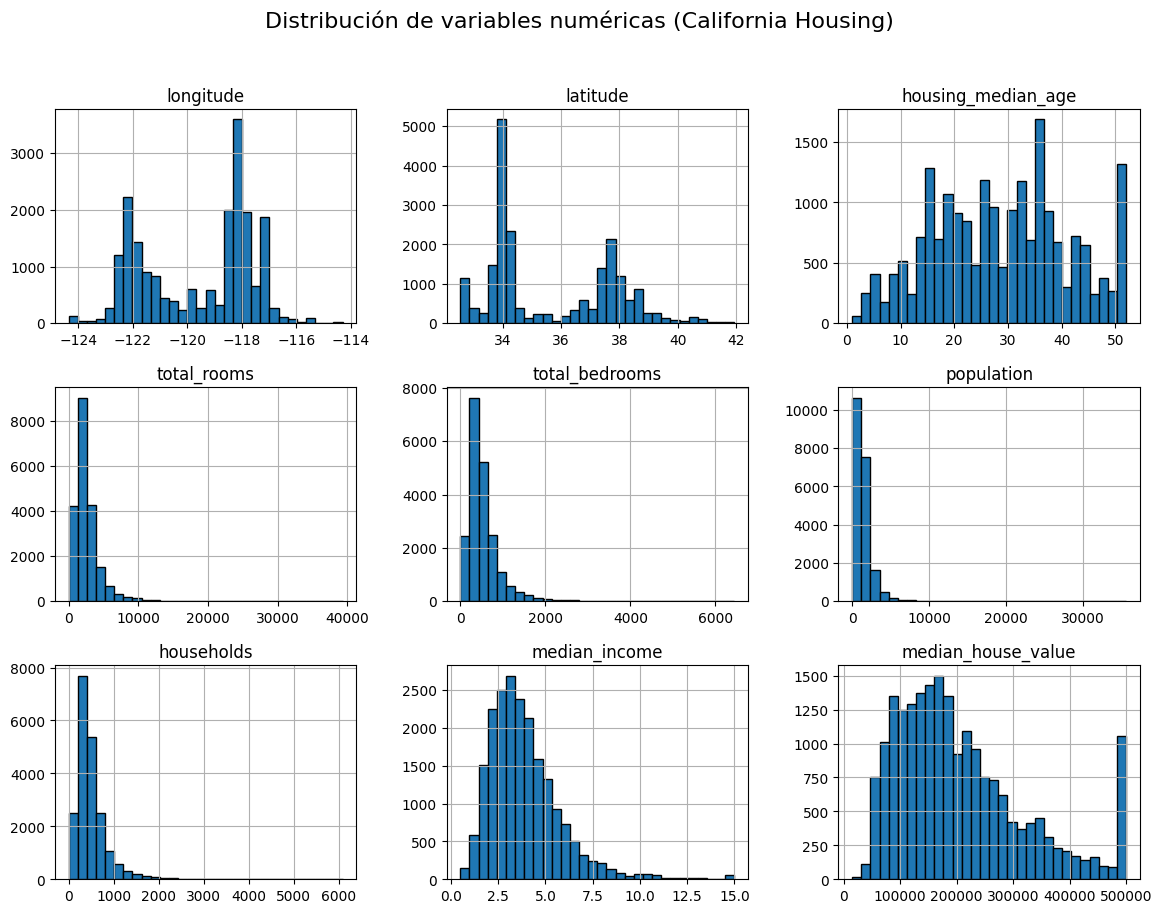

In [ ]:
# Definir columnas numéricas y categóricas
num_cols = df_ca.select_dtypes(include="number").columns

# Crear figura de histogramas
plt.figure(figsize=(12, 8))
# Histograma de variables numéricas
df_ca[num_cols].hist(bins=30, figsize=(14,10), edgecolor='black')
# Ajustar título
plt.suptitle("Distribución de variables numéricas (California Housing)", fontsize=16)
# Mostrar gráficos
plt.show()

In [ ]:
# Conteo de categorías en 'ocean_proximity'
df_ca["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
# Contar valores faltantes
faltantes = df_ca.isna().sum().sort_values(ascending=False)

# Mostrar solo las columnas que tengan algún NaN
faltantes = faltantes[faltantes > 0]
faltantes

total_bedrooms    207
dtype: int64

In [8]:
# Seleccionar solo columnas numéricas
num_df = df_ca.select_dtypes(include="number")

# Calcular matriz de correlación
corr = num_df.corr(numeric_only=True)

# Mostrar correlación de cada variable con el valor de la vivienda
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

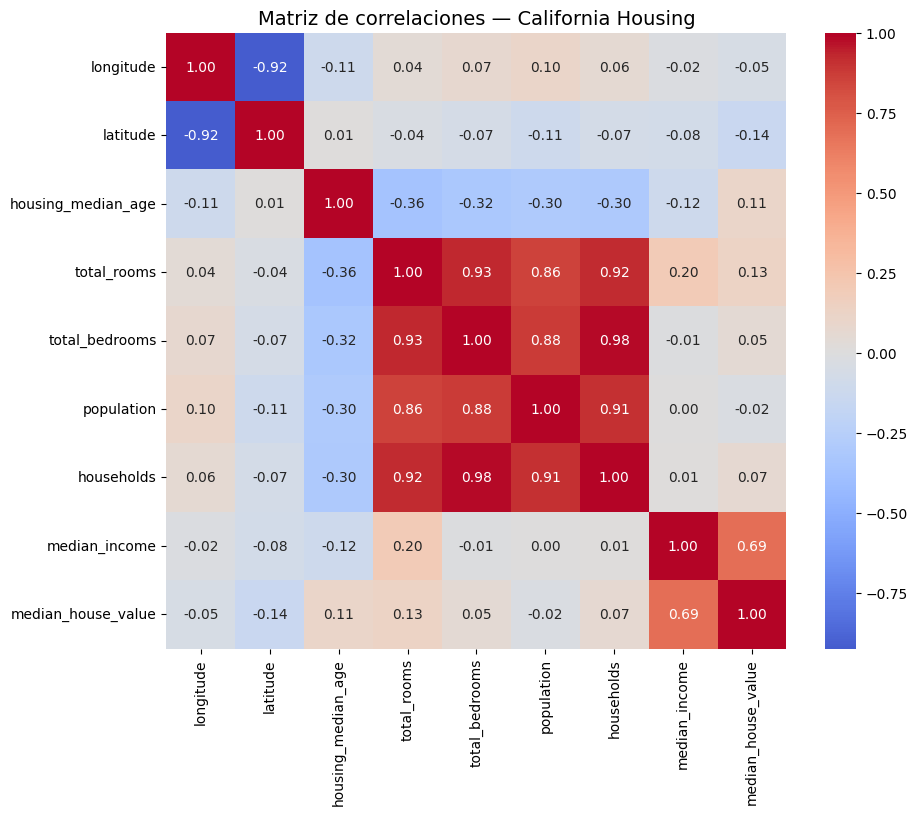

In [9]:
# Visualizar matriz de correlación
plt.figure(figsize=(10,8))
# Mapa de calor
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
# Título
plt.title("Matriz de correlaciones — California Housing", fontsize=14)
plt.show()


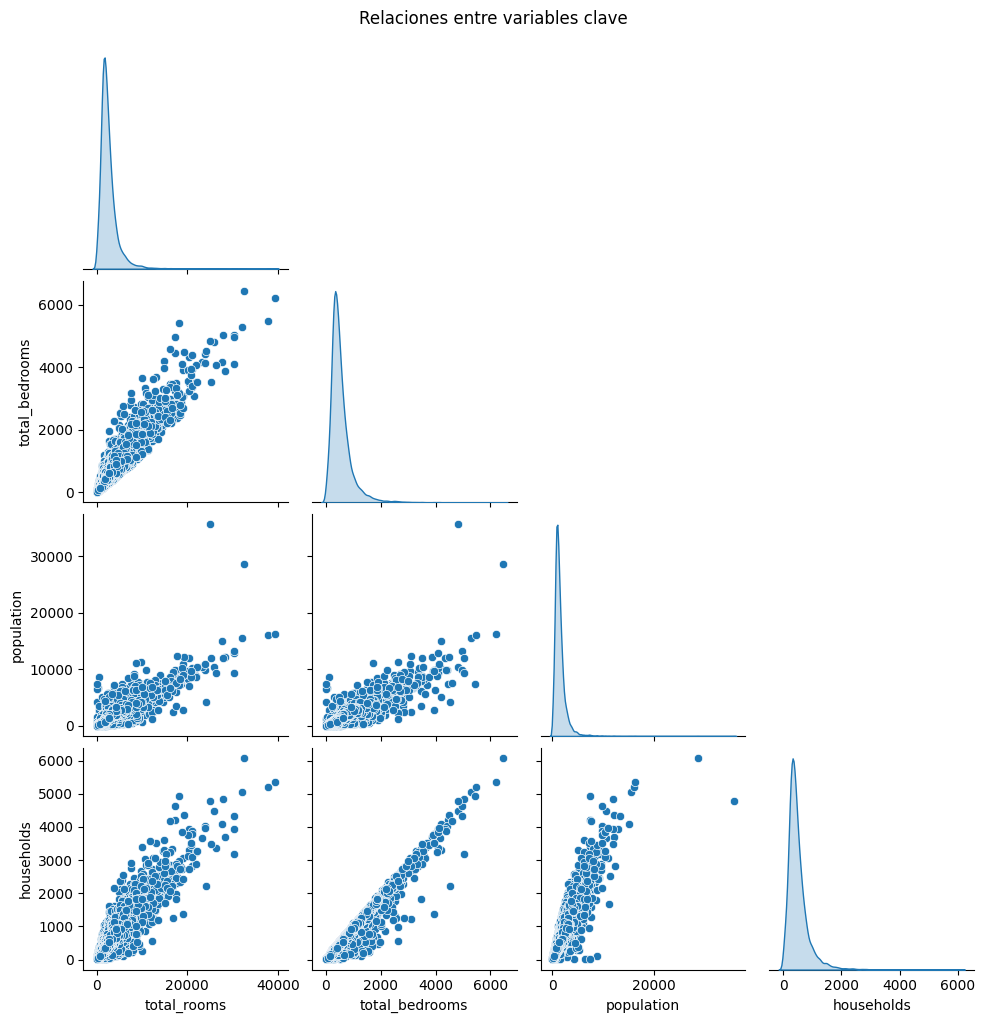

In [12]:
# Gráficos de dispersión entre variables clave
cols_interes = ["total_rooms", "total_bedrooms", "population", "households"]
# Pairplot
sns.pairplot(df_ca[cols_interes], diag_kind="kde", corner=True)
# Ajustar título
plt.suptitle("Relaciones entre variables clave", y=1.02)
plt.show()

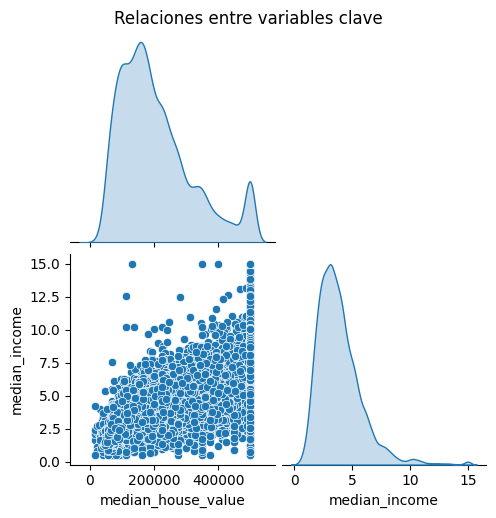

In [13]:
# Gráficos de dispersión entre variables clave
cols_interes = ["median_house_value", "median_income"]
# Pairplot
sns.pairplot(df_ca[cols_interes], diag_kind="kde", corner=True)
# Ajustar título
plt.suptitle("Relaciones entre variables clave", y=1.02)
plt.show()

In [14]:
df_ca["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
df_ca.groupby("ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

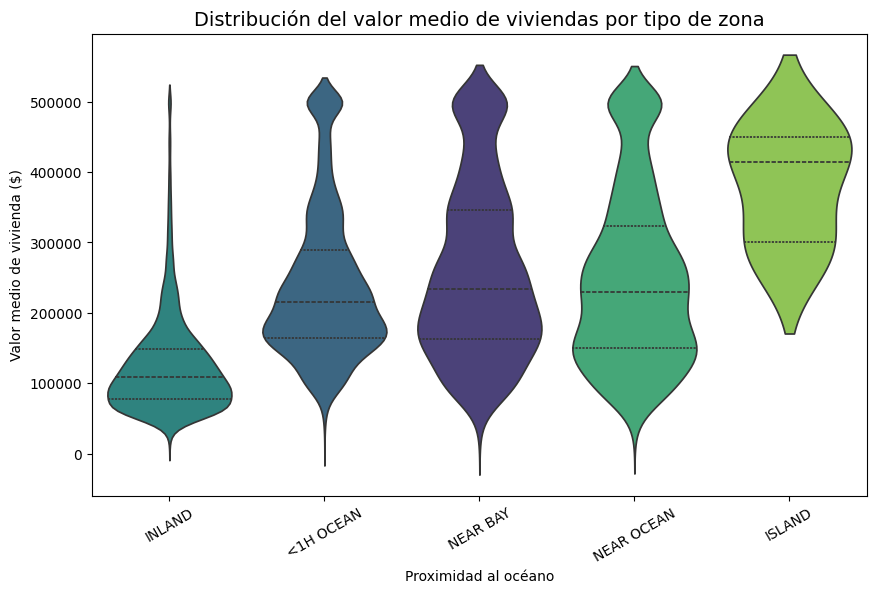

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_ca,
    x="ocean_proximity",
    y="median_house_value",
    order=["INLAND", "<1H OCEAN", "NEAR BAY", "NEAR OCEAN", "ISLAND"],
    inner="quartile",
    hue="ocean_proximity",
    legend=False,
    palette="viridis"
)
plt.title("Distribución del valor medio de viviendas por tipo de zona", fontsize=14)
plt.xlabel("Proximidad al océano")
plt.ylabel("Valor medio de vivienda ($)")
plt.xticks(rotation=30)
plt.show()
